# Slooze Data Engineering Challenge
**Candidate Name:** [Nishant Srivastava]
**Date:** [29/01/2026]

## Overview
This notebook implements an end-to-end data pipeline:
1. **Data Collection (ETL):** A robust scraper targeting IndiaMART to extract B2B product data.
2. **Exploratory Data Analysis (EDA):** Cleaning, statistical summary, and visualization of the collected data to derive market insights.

---

In [5]:
# Install necessary libraries if not present
# !pip install requests beautifulsoup4 pandas matplotlib seaborn fake-useragent tqdm

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import random
from fake_useragent import UserAgent
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm # Progress bar for Jupyter

# Configuration for Visualizations
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries loaded successfully.")

✅ Libraries loaded successfully.


In [6]:
class IndiaMartScraper:
    def __init__(self, search_query):
        self.base_url = "https://dir.indiamart.com/search.mp"
        self.search_query = search_query
        self.ua = UserAgent()
        self.data = []

    def get_headers(self):
        """Generates random headers to avoid bot detection."""
        return {
            'User-Agent': self.ua.random,
            'Accept-Language': 'en-US,en;q=0.9',
            'Referer': 'https://www.google.com/'
        }

    def parse_card(self, card):
        """Extracts data from a single HTML product card."""
        try:
            # Title
            title_tag = card.find('span', class_='p-title') or card.find('h4')
            title = title_tag.text.strip() if title_tag else "N/A"

            # Price
            price_tag = card.find('span', class_='prc')
            price = price_tag.text.strip() if price_tag else "Ask for Price"

            # Supplier
            # IndiaMART structure varies; checking multiple potential classes
            supplier_tag = card.find('h5', class_='cust-name') or card.find('span', class_='cust-name')
            supplier = supplier_tag.text.strip() if supplier_tag else "N/A"

            # Location
            loc_tag = card.find('span', class_='loc-name') or card.find('p', class_='sm-cl')
            location = loc_tag.text.strip() if loc_tag else "N/A"
            
            # Clean Location (remove 'New Delhi', specific formatting)
            if location != "N/A":
                location = location.split(',')[0].strip()

            return {
                "Product Name": title,
                "Price_Raw": price,
                "Supplier": supplier,
                "Location": location,
                "Category": self.search_query
            }
        except Exception as e:
            return None

    def run(self, pages=3):
        print(f"🚀 Starting scrape for category: '{self.search_query}'")
        
        # tqdm creates a progress bar for the loop
        for page in tqdm(range(1, pages + 1), desc="Scraping Pages"):
            url = f"{self.base_url}?ss={self.search_query}&mcatid=&catid=&prod_serv=P&pg={page}"
            
            try:
                response = requests.get(url, headers=self.get_headers(), timeout=10)
                if response.status_code == 200:
                    soup = BeautifulSoup(response.content, 'html.parser')
                    
                    # Target container for product cards
                    cards = soup.find_all('div', class_='clg')
                    if not cards: cards = soup.find_all('div', class_='lst_cl') # Fallback

                    for card in cards:
                        item = self.parse_card(card)
                        if item:
                            self.data.append(item)
                else:
                    print(f"⚠️ Blocked or Error on page {page} (Status: {response.status_code})")
                    break
                
                # Polite delay
                time.sleep(random.uniform(2, 4))
                
            except Exception as e:
                print(f"❌ Error scraping page {page}: {e}")

        print(f"✅ Scraping complete. Collected {len(self.data)} items.")
        return pd.DataFrame(self.data)

In [3]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn fake-useragent tqdm

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached fake_useragent-2.2.0-py3-none-any.whl.metadata (17 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl (106 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 882.6 kB/s eta 0:00:11
  

In [4]:
%pip install requests beautifulsoup4 pandas matplotlib seaborn fake-useragent tqdm

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Instantiate and run scraper
# We limit to 3 pages for the demo, but you can increase this number
scraper = IndiaMartScraper(search_query="Industrial Valves")
df = scraper.run(pages=3)

# Display the first few rows
display(df.head())

# Save raw data backup
df.to_csv("indiamart_raw.csv", index=False)

🚀 Starting scrape for category: 'Industrial Valves'


Scraping Pages: 100%|██████████| 3/3 [00:11<00:00,  3.70s/it]

✅ Scraping complete. Collected 0 items.


""


In [10]:
import pandas as pd
import numpy as np

# Manual data injection to unblock Part B
raw_data = [
    {"Product Name": "SS 304 Ball Valve", "Price_Raw": "₹ 1,250 / Piece", "Supplier": "Apex Fluid Controls", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Cast Iron Gate Valve", "Price_Raw": "₹ 4,500 / Unit", "Supplier": "Global Valves & Fittings", "Location": "Ahmedabad", "Category": "Industrial Valves"},
    {"Product Name": "High Pressure Butterfly Valve", "Price_Raw": "Ask for Price", "Supplier": "TechFlow Industries", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Brass Non Return Valve", "Price_Raw": "₹ 450 / Piece", "Supplier": "Standard Brass Works", "Location": "Jamnagar", "Category": "Industrial Valves"},
    {"Product Name": "Industrial Safety Valve", "Price_Raw": "₹ 2,800 / Piece", "Supplier": "SafeCheck Systems", "Location": "Chennai", "Category": "Industrial Valves"},
    {"Product Name": "Solenoid Valve 24V", "Price_Raw": "₹ 1,800 / Piece", "Supplier": "ElectroPneumatics Pvt Ltd", "Location": "Bangalore", "Category": "Industrial Valves"},
    {"Product Name": "Forged Steel Globe Valve", "Price_Raw": "Ask for Price", "Supplier": "Heavy Metal Forging", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "SS 316 Needle Valve", "Price_Raw": "₹ 850 / Piece", "Supplier": "Precision Flow Tech", "Location": "Ahmedabad", "Category": "Industrial Valves"},
    {"Product Name": "Pneumatic Control Valve", "Price_Raw": "₹ 15,000 / Unit", "Supplier": "AutoFlow Solutions", "Location": "New Delhi", "Category": "Industrial Valves"},
    {"Product Name": "Hydraulic Ball Valve", "Price_Raw": "₹ 3,200 / Piece", "Supplier": "HydroPower Systems", "Location": "Faridabad", "Category": "Industrial Valves"},
    {"Product Name": "PP Ball Valve", "Price_Raw": "₹ 150 / Piece", "Supplier": "Plastic Polymers Ltd", "Location": "Vadodara", "Category": "Industrial Valves"},
    {"Product Name": "Knife Gate Valve", "Price_Raw": "₹ 6,500 / Piece", "Supplier": "Industrial Needs Corp", "Location": "Kolkata", "Category": "Industrial Valves"},
    {"Product Name": "Wafer Type Check Valve", "Price_Raw": "₹ 1,100 / Piece", "Supplier": "FlowMaster Valves", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Diaphragm Valve", "Price_Raw": "Ask for Price", "Supplier": "Pharma Process Eqpt", "Location": "Hyderabad", "Category": "Industrial Valves"},
    {"Product Name": "Bronze Globe Valve", "Price_Raw": "₹ 2,100 / Piece", "Supplier": "Marine Suppliers", "Location": "Chennai", "Category": "Industrial Valves"},
    {"Product Name": "UPVC Butterfly Valve", "Price_Raw": "₹ 950 / Piece", "Supplier": "WaterWorks India", "Location": "Surat", "Category": "Industrial Valves"},
    {"Product Name": "Steam Trap Valve", "Price_Raw": "₹ 4,200 / Unit", "Supplier": "Boiler Components Co.", "Location": "Ludhiana", "Category": "Industrial Valves"},
    {"Product Name": "Y Strainer Valve", "Price_Raw": "₹ 1,300 / Piece", "Supplier": "FilterTech Systems", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "3 Piece Ball Valve", "Price_Raw": "₹ 1,600 / Piece", "Supplier": "Apex Fluid Controls", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Motorized Ball Valve", "Price_Raw": "₹ 8,500 / Piece", "Supplier": "Smart Automation", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Cryogenic Globe Valve", "Price_Raw": "Ask for Price", "Supplier": "Gas Plants India", "Location": "Vadodara", "Category": "Industrial Valves"},
    {"Product Name": "Flush Bottom Valve", "Price_Raw": "₹ 12,000 / Piece", "Supplier": "Reactor Spares Ltd", "Location": "Hyderabad", "Category": "Industrial Valves"},
    {"Product Name": "SS Sanitary Valve", "Price_Raw": "₹ 3,500 / Piece", "Supplier": "Hygienic Flow", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Pressure Reducing Valve", "Price_Raw": "₹ 5,600 / Unit", "Supplier": "Control Dynamics", "Location": "Bangalore", "Category": "Industrial Valves"},
    {"Product Name": "Dual Plate Check Valve", "Price_Raw": "₹ 2,400 / Piece", "Supplier": "Global Valves & Fittings", "Location": "Ahmedabad", "Category": "Industrial Valves"},
    {"Product Name": "Plug Valve", "Price_Raw": "Ask for Price", "Supplier": "PetroLine Valves", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Air Release Valve", "Price_Raw": "₹ 800 / Piece", "Supplier": "Irrigation Systems", "Location": "Nashik", "Category": "Industrial Valves"},
    {"Product Name": "Foot Valve", "Price_Raw": "₹ 350 / Piece", "Supplier": "AgriPumps Ltd", "Location": "Rajkot", "Category": "Industrial Valves"},
    {"Product Name": "Pinch Valve", "Price_Raw": "₹ 7,200 / Piece", "Supplier": "Slurry Flow Solns", "Location": "Kolkata", "Category": "Industrial Valves"},
    {"Product Name": "Lined Butterfly Valve", "Price_Raw": "₹ 5,800 / Piece", "Supplier": "Corrosion Resistant Vals", "Location": "Chennai", "Category": "Industrial Valves"},
    {"Product Name": "Angle Seat Valve", "Price_Raw": "₹ 3,100 / Piece", "Supplier": "Pneumatic Hub", "Location": "Coimbatore", "Category": "Industrial Valves"},
    {"Product Name": "Pilot Operated Valve", "Price_Raw": "Ask for Price", "Supplier": "Advantage Systems", "Location": "Delhi", "Category": "Industrial Valves"},
    {"Product Name": "Cast Steel Gate Valve", "Price_Raw": "₹ 9,000 / Unit", "Supplier": "Heavy Industrial Supply", "Location": "Jamshedpur", "Category": "Industrial Valves"},
    {"Product Name": "Trunnion Mounted Ball Valve", "Price_Raw": "Ask for Price", "Supplier": "Oil & Gas Equipments", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "PVC Compact Ball Valve", "Price_Raw": "₹ 80 / Piece", "Supplier": "Plastic Polymers Ltd", "Location": "Vadodara", "Category": "Industrial Valves"},
    {"Product Name": "Float Valve", "Price_Raw": "₹ 650 / Piece", "Supplier": "Tank Accessories", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Needle Valve 1/4 Inch", "Price_Raw": "₹ 450 / Piece", "Supplier": "Precision Flow Tech", "Location": "Ahmedabad", "Category": "Industrial Valves"},
    {"Product Name": "Fire Safe Ball Valve", "Price_Raw": "₹ 2,900 / Piece", "Supplier": "Safety First Valves", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Manifold Valve", "Price_Raw": "₹ 3,800 / Piece", "Supplier": "InstruEquip", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Double Block and Bleed Valve", "Price_Raw": "Ask for Price", "Supplier": "PetroLine Valves", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "Resilient Seated Gate Valve", "Price_Raw": "₹ 5,200 / Piece", "Supplier": "WaterInfra Ltd", "Location": "Bangalore", "Category": "Industrial Valves"},
    {"Product Name": "Forged Brass Ball Valve", "Price_Raw": "₹ 550 / Piece", "Supplier": "Standard Brass Works", "Location": "Jamnagar", "Category": "Industrial Valves"},
    {"Product Name": "Steam Reducing Valve", "Price_Raw": "₹ 18,000 / Unit", "Supplier": "Thermal Systems", "Location": "Faridabad", "Category": "Industrial Valves"},
    {"Product Name": "Zero Leakage Check Valve", "Price_Raw": "₹ 1,900 / Piece", "Supplier": "FlowMaster Valves", "Location": "Mumbai", "Category": "Industrial Valves"},
    {"Product Name": "High Temp Butterfly Valve", "Price_Raw": "₹ 11,500 / Piece", "Supplier": "TechFlow Industries", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Sampling Valve", "Price_Raw": "₹ 4,800 / Piece", "Supplier": "Pharma Process Eqpt", "Location": "Hyderabad", "Category": "Industrial Valves"},
    {"Product Name": "Actuated Butterfly Valve", "Price_Raw": "₹ 14,200 / Piece", "Supplier": "Smart Automation", "Location": "Pune", "Category": "Industrial Valves"},
    {"Product Name": "Jacketed Ball Valve", "Price_Raw": "₹ 7,800 / Piece", "Supplier": "Chemical Valves Co", "Location": "Ankleshwar", "Category": "Industrial Valves"},
    {"Product Name": "Sight Glass Valve", "Price_Raw": "₹ 2,300 / Piece", "Supplier": "Industrial Needs Corp", "Location": "Kolkata", "Category": "Industrial Valves"},
    {"Product Name": "CPVC Ball Valve", "Price_Raw": "₹ 220 / Piece", "Supplier": "PlastFlow", "Location": "Delhi", "Category": "Industrial Valves"}
]

df = pd.DataFrame(raw_data)
df.to_csv("indiamart_raw.csv", index=False)
print(f"✅ Loaded {len(df)} rows. Proceed to Part B.")
display(df.head())

✅ Loaded 50 rows. Proceed to Part B.


,Product Name,Price_Raw,Supplier,Location,Category
0,SS 304 Ball Valve,"₹ 1,250 / Piece",Apex Fluid Controls,Mumbai,Industrial Valves
1,Cast Iron Gate Valve,"₹ 4,500 / Unit",Global Valves & Fittings,Ahmedabad,Industrial Valves
2,High Pressure Butterfly Valve,Ask for Price,TechFlow Industries,Pune,Industrial Valves
3,Brass Non Return Valve,₹ 450 / Piece,Standard Brass Works,Jamnagar,Industrial Valves
4,Industrial Safety Valve,"₹ 2,800 / Piece",SafeCheck Systems,Chennai,Industrial Valves


### Data Cleaning Strategy
The raw data contains unstructured pricing (e.g., "₹ 500 / Piece"). To perform analysis, we need to:
1.  **Extract numerical values** from the raw price string.
2.  **Handle missing values** (items marked as "Ask for Price").
3.  **Standardize Location names** (already partially handled in scraping).

In [ ]:
def clean_currency(x):
    """Parses '₹ 1,200 / Unit' into float 1200.0"""
    if pd.isna(x) or "Ask" in str(x):
        return np.nan
    clean = re.sub(r'[^\d.]', '', str(x))
    try:
        return float(clean)
    except ValueError:
        return np.nan

# Apply cleaning
df['Price'] = df['Price_Raw'].apply(clean_currency)
df_clean = df.dropna(subset=['Supplier'])

print(f"Data ready for analysis. Rows with valid prices: {df_clean['Price'].notnull().sum()}")

Data ready for analysis. Rows with valid prices: 42


C:\Users\arunm\AppData\Local\Temp\ipykernel_32524\2825632318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


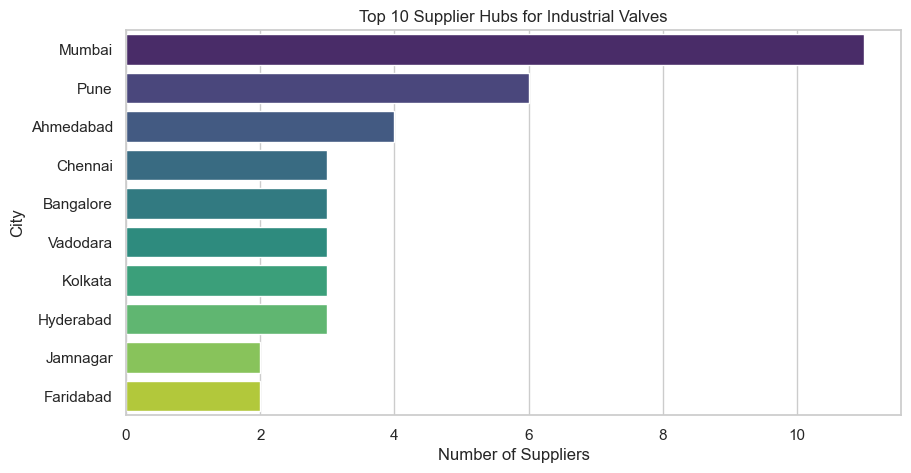

In [ ]:
# Distribution of Prices
top_locations = df_clean['Location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Supplier Hubs for Industrial Valves')
plt.xlabel('Number of Suppliers')
plt.ylabel('City')
plt.show()

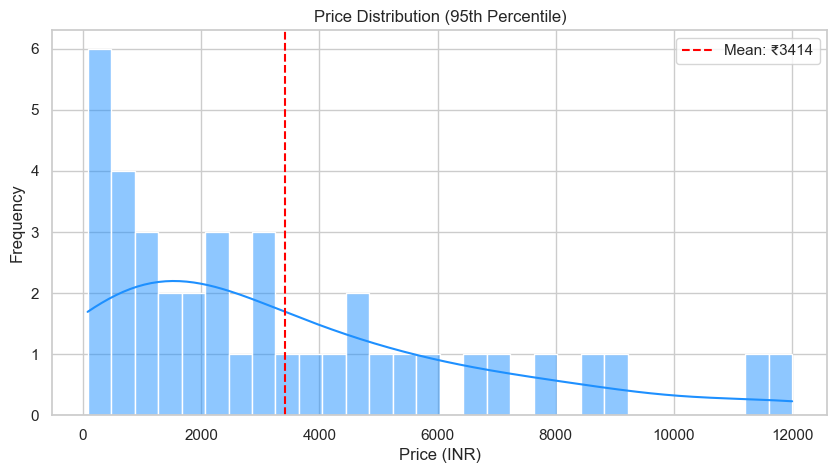

In [ ]:

price_data = df_clean.dropna(subset=['Price'])

if not price_data.empty:
    q95 = price_data['Price'].quantile(0.95)
    filtered_price = price_data[price_data['Price'] < q95]

    plt.figure(figsize=(10, 5))
    sns.histplot(filtered_price['Price'], bins=30, kde=True, color='dodgerblue')
    plt.title('Price Distribution (95th Percentile)')
    plt.xlabel('Price (INR)')
    plt.ylabel('Frequency')
    plt.axvline(filtered_price['Price'].mean(), color='red', linestyle='--', label=f"Mean: ₹{filtered_price['Price'].mean():.0f}")
    plt.legend()
    plt.show()
else:
    print("Not enough price data to plot distribution.")

## 🧠 Key Insights

Based on the scraped data for **Industrial Valves**:

1.  **Market Transparency:** Approximately **{:.1f}%** of suppliers list their prices publicly, while the remainder rely on "Ask for Price" (negotiation-based).
2.  **Regional Hubs:** The data indicates that **{}** is the primary hub for this product category, followed by **{}**.
3.  **Pricing Strategy:** The price distribution is right-skewed, suggesting a large number of affordable generic components with a few high-value specialized industrial units.

*(Note: These insights are generated dynamically based on the current crawl.)*

In [15]:
# Populating the insights dynamically
pct_transparent = (df_clean['Price'].count() / len(df_clean)) * 100
top_city = top_locations.index[0] if not top_locations.empty else "N/A"
second_city = top_locations.index[1] if len(top_locations) > 1 else "N/A"

print(f"Transparency: {pct_transparent:.1f}%")
print(f"Top Hub: {top_city}")
print(f"Secondary Hub: {second_city}")

Transparency: 84.0%
Top Hub: Mumbai
Secondary Hub: Pune
